In [4]:
import pandas as p
import matplotlib.pyplot as plt

In [8]:
# Step 1: Load the CSV file
file_path = 'sales_data.csv'
sales_data = pd.read_csv(file_path)

In [10]:
# Step 2: Clean the data
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['price'] = pd.to_numeric(sales_data['price'], errors='coerce')
sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce')
sales_data['revenue'] = pd.to_numeric(sales_data['revenue'], errors='coerce')
sales_data = sales_data.dropna()
sales_data = sales_data[(sales_data['price'] > 0) & (sales_data['quantity'] > 0) & (sales_data['revenue'] > 0)]

In [12]:
# Step 3: Answer the questions
print("1. Total Revenue:", sales_data['revenue'].sum())
print("2. Product with Highest Revenue:", sales_data.groupby('product')['revenue'].sum().idxmax())
print("3. Average Price:", sales_data['price'].mean())
print("4. Total Quantity Sold:", sales_data['quantity'].sum())
print("5. Category with Highest Revenue:", sales_data.groupby('category')['revenue'].sum().idxmax())
print("6. Average Revenue Per Sale:", sales_data['revenue'].mean())

1. Total Revenue: 748430.0
2. Product with Highest Revenue: Smartphone
3. Average Price: 210.1917808219178
4. Total Quantity Sold: 5300.0
5. Category with Highest Revenue: Electronics
6. Average Revenue Per Sale: 2050.4931506849316


In [14]:
# Quarterly Revenue
sales_data['quarter'] = sales_data['date'].dt.quarter
quarterly_revenue = sales_data.groupby('quarter')['revenue'].sum()
print("7. Quarterly Revenue:")
for quarter, revenue in quarterly_revenue.items():
    print(f"Q{quarter}: ${revenue:.2f}")

7. Quarterly Revenue:
Q1: $182100.00
Q2: $177370.00
Q3: $195430.00
Q4: $193530.00


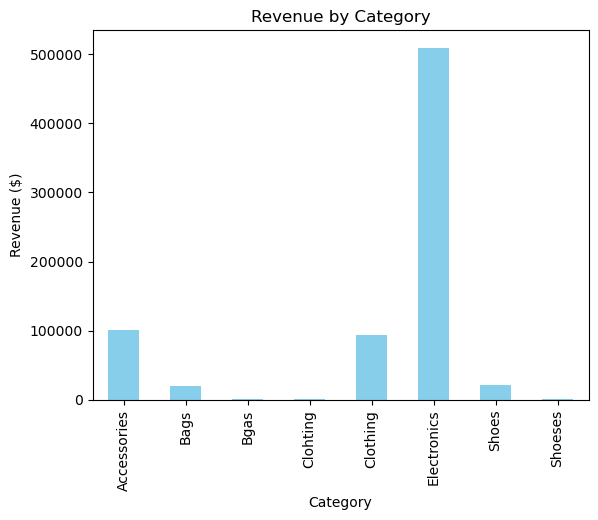

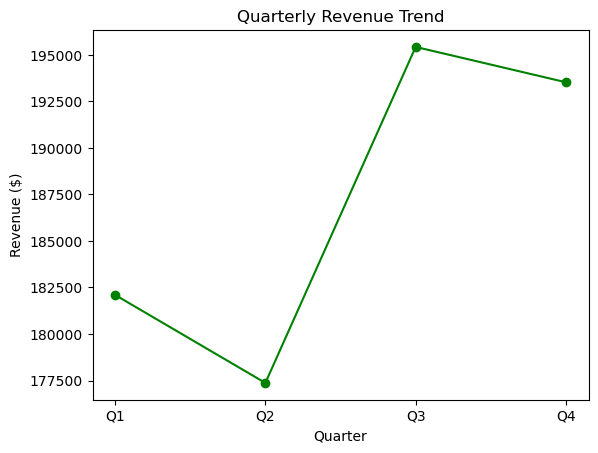

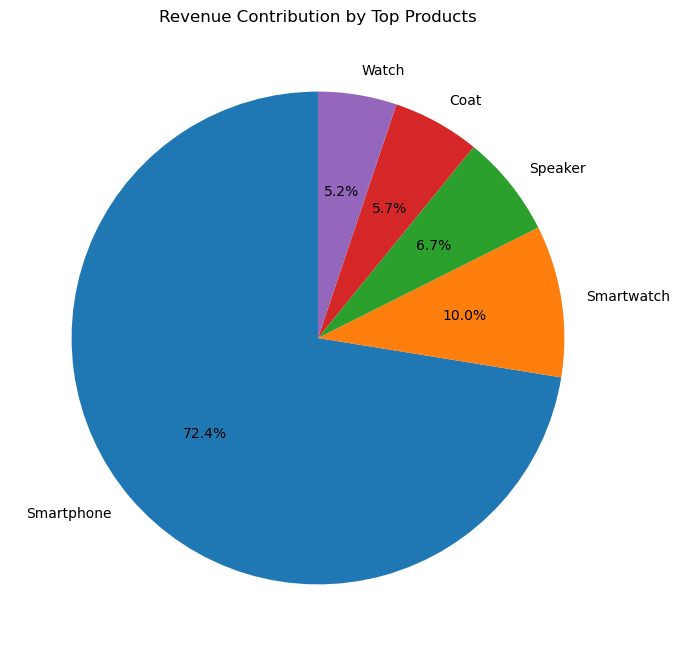

In [16]:
# Step 4: Visualizations
category_revenue = sales_data.groupby('category')['revenue'].sum()
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue ($)')
plt.show()

quarterly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Quarterly Revenue Trend')
plt.xlabel('Quarter')
plt.ylabel('Revenue ($)')
plt.xticks(quarterly_revenue.index, [f"Q{q}" for q in quarterly_revenue.index])
plt.show()

top_products = sales_data.groupby('product')['revenue'].sum().nlargest(5)
top_products.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Revenue Contribution by Top Products')
plt.ylabel('')
plt.show()